# 1. Data clean up – Missing value treatment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv(r'D:\Data_Science\Python\ass\ass1\playstore-analysis (2) (1).csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


a. Drop records where rating is missing since rating is our target/study variable

In [5]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
df=df.dropna(axis=0, subset=['Rating'])

In [7]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

b. Check the null values for the Android Ver column.

In [8]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


i. Are all 3 records having the same problem?

-Yes, all 3 records are having same problem ie all are NaN.

In [9]:
df=df[df.App!='Life Made WI-Fi Touchscreen Photo Frame']

In [10]:
df.loc[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


iii. Replace remaining missing values with the mode

In [11]:
df['Android Ver']=df['Android Ver'].fillna(df['Android Ver'].mode()[0])

c. Current ver – replace with most common value

In [12]:
df['Current Ver']=df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


# 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

In [14]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

-Reviews and Installs need to converted to integer type.

b. Price variable – remove $ sign and convert to float

In [15]:
df['Price'] = df['Price'].str.replace('$','').astype(float)

C:\Users\Ronnie\AppData\Local\Temp/ipykernel_1108/3484904116.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$','').astype(float)


In [16]:
print(df['Price'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 9366, dtype: float64


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [17]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)

C:\Users\Ronnie\AppData\Local\Temp/ipykernel_1108/3811514834.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)


In [18]:
print(df['Installs'])

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32


d. Convert all other identified columns to numeric

In [19]:
df['Reviews']=df['Reviews'].astype(int)

# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.

In [20]:
df.loc[df.Rating < 1] & df.loc[df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


-There are no records with rating less than 1 and greated than 5

b. Reviews should not be more than installs as only those who installed can review the app.

i. Are there any such records? Drop if so.

In [21]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


-Yes, there are 7 records where Reviews is greater than Installs.

In [22]:
df= df.drop(df[df['Reviews'] > df['Installs']].index)

In [23]:
df.loc[df['Reviews'] > df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


# 4. Identify and handle outliers –

a. Price column

    i. Make suitable plot to identify outliers in price

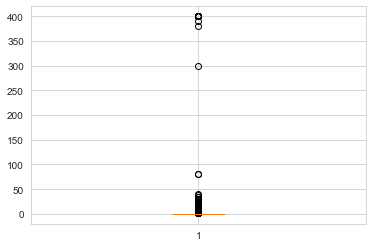

In [24]:
plt.boxplot(df['Price'])
plt.show()

    ii. Do you expect apps on the play store to cost $200? Check out these cases

In [25]:
df.loc[df['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


-Yes we can expect apps on the play store to cost $200. There are atleast 15 such cases.

    iii. After dropping the useless records, make the suitable plot again to identify 
    outliers

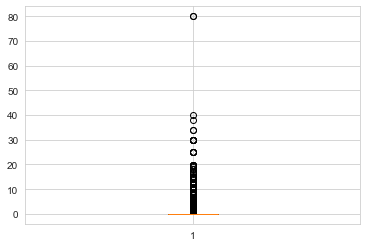

In [26]:
df= df.drop(df[df['Price'] >200].index)
plt.boxplot(df['Price'])
plt.show()

    iv. Limit data to records with price < $30

In [27]:
df= df.drop(df[df['Price'] >= 30].index)

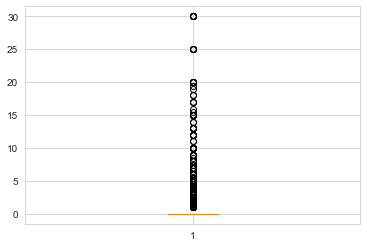

In [28]:
plt.boxplot(df['Price'])
plt.show()

b. Reviews column

    i. Make suitable plot

C:\Users\Ronnie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


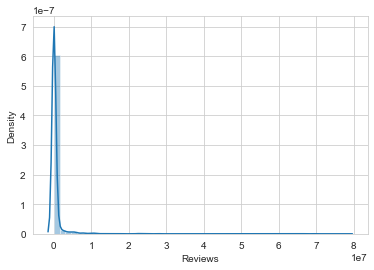

In [29]:
sns.distplot(df['Reviews'])
plt.show()

    ii. Limit data to apps with < 1 Million reviews

In [30]:
df= df.drop(df[df['Reviews'] >= 1000000].index)

c. Installs

    i. What is the 95th percentile of the installs?

In [31]:
print("The 95th percentile of the installs is ",df['Installs'].quantile(0.95))

The 95th percentile of the installs is  10000000.0


    ii. Drop records having a value more than the 95th percentile

In [32]:
df= df.drop(df[df['Installs'] >10000000].index)

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

a. How do you explain this?

C:\Users\Ronnie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


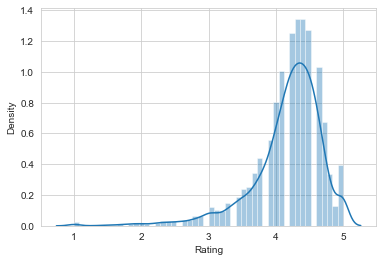

The skewness of this distribution is -1.7434270330647985
The Median of this distribution is 4.3
The Mean of this distribution is 4.170800237107298
The Mode of this distribution is 0    4.3
dtype: float64


In [33]:
sns.distplot(df['Rating'])
plt.show()
print('The skewness of this distribution is',df['Rating'].skew())
print('The Median of this distribution is',df['Rating'].median())
print('The Mean of this distribution is',df['Rating'].mean())
print('The Mode of this distribution is',df['Rating'].mode())

b. What is the implication of this on your analysis?

-The general relationship between the central tendency measures of this distribution is Mode >= Median > Mean which occurs in a negatively skewed distribution. So the ratings are more skewed towards lower values.

# 6. What are the top Content Rating values?

a. Are there any values with very few records?

In [34]:
df['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

-'Adults only 18+' and 'Unrated' are the only values with too few redords. So they are dropped.

In [35]:
df=df.drop(df[df['Content Rating']=='Adults only 18+'].index)
df=df.drop(df[df['Content Rating']=='Unrated'].index)

In [36]:
df['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

# 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

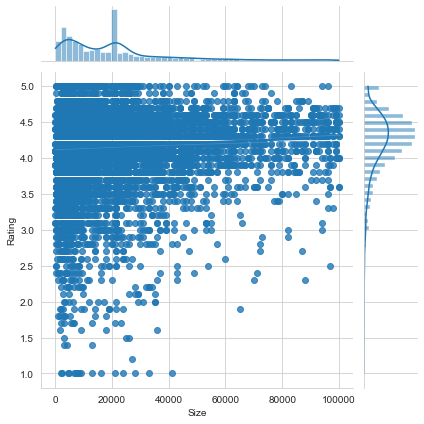

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


In [37]:
sns.jointplot(y='Rating',x='Size', data=df,kind='reg')
plt.show()
df.corr()

b. Do you see any patterns?

-Yes, patterns can be be seen.

c. How do you explain the pattern?

-Size of the application increases as rating increases but not always true for high rating. On reaching the peak value there is indifference towards the size. So there is a positive correlation between size and rating.

# 8. Effect of price on rating

a. Make a jointplot (with regression line)

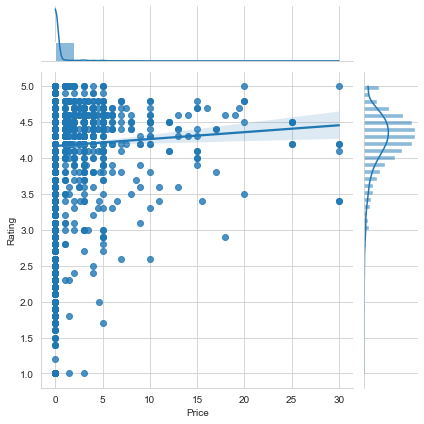

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.158547,0.058076,0.118414,0.031479
Reviews,0.158547,1.000000,0.204667,0.736038,-0.073446
Size,0.058076,0.204667,1.000000,0.190741,-0.001054
Installs,0.118414,0.736038,0.190741,1.000000,-0.110507
Price,0.031479,-0.073446,-0.001054,-0.110507,1.000000


In [38]:
sns.jointplot(y='Rating',x='Price', data=df,kind='reg')
plt.show()
df.corr()

b. Do you see any patterns?

-Mostly, on increasing the price, the rating remains almost constant just around the regression line,i.e above 4.0.

c. How do you explain the pattern?

-As on increasing the price, the rating remains almost constant above 4, hence it can be concluded that there is a weak positive correlation between price and rating. 

d. Replot the data, this time with only records with price > 0

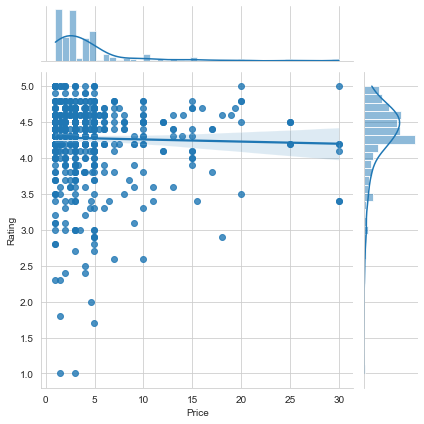

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.095986,0.117943,0.063960,-0.025975
Reviews,0.095986,1.000000,0.163959,0.787628,-0.049764
Size,0.117943,0.163959,1.000000,0.119255,0.024912
Installs,0.063960,0.787628,0.119255,1.000000,-0.057710
Price,-0.025975,-0.049764,0.024912,-0.057710,1.000000


In [39]:
df1=df.loc[df.Price>0]
sns.jointplot(y='Rating',x='Price', data=df1,kind='reg')
plt.show()
df1.corr()

e. Does the pattern change?

-There is a slight change in the pattern as we removed the objects with price >0. Now, there is a weak neagative correlation between price and rating.

f. What is your overall inference on the effect of price on the rating?

-Increasing the prices does not have a significant effect on higher rating. The rating remains almost constant just around the regression line,i.e above 4.0.

# 9. Look at all the numeric interactions together –

a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

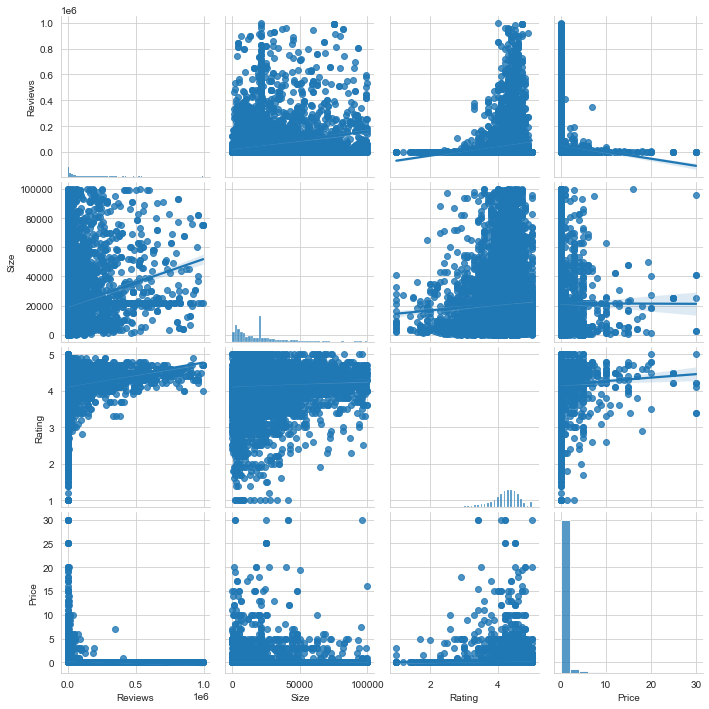

In [40]:
sns.pairplot(df, vars=['Reviews', 'Size', 'Rating', 'Price'],kind='reg')
plt.show()

# 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

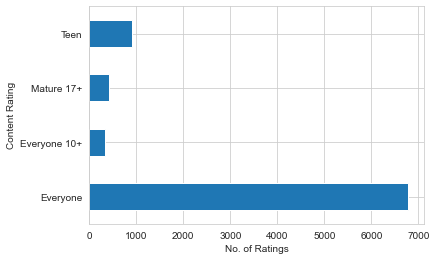

In [41]:
df.groupby(['Content Rating'])['Rating'].count().plot.barh()
plt.xlabel("No. of Ratings")
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

-As outliers are present in the Rating field, median would be the best approach.

c. Choose the right metric and plot

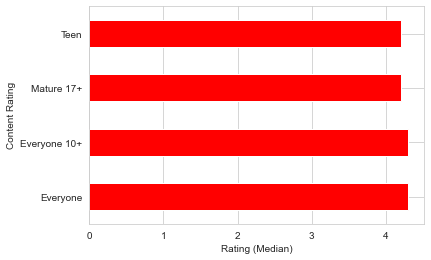

In [42]:
df.groupby(['Content Rating'])['Rating'].median().plot.barh(color='Red')
plt.xlabel("Rating (Median)")
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

In [43]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
df['Bucket Size'] = pd.cut(df['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,4.145730,4.247561,4.010582,4.182240
20k-40k,4.200195,4.169811,4.156291,4.170432
40k-60k,4.167083,4.263636,4.190476,4.237383
60k-80k,4.245408,4.280769,4.200000,4.274194
80k-100k,4.260127,4.304762,4.252632,4.270313


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [44]:
tmp=pd.pivot_table(df, values='Rating', index='Bucket Size', columns='Content Rating', aggfunc=lambda x:np.quantile(x,0.2))
tmp

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.80,4.02,3.5,3.9
20k-40k,4.00,4.00,4.0,3.9
40k-60k,3.90,4.06,4.1,4.0
60k-80k,4.00,4.00,4.0,4.0
80k-100k,4.04,4.10,4.0,4.0


c. Make a heatmap of this

i. Annotated

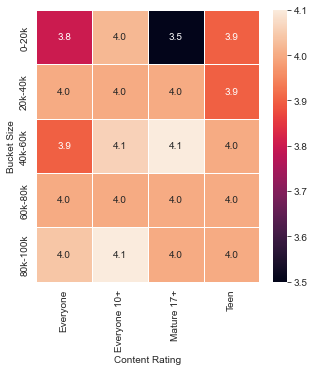

In [45]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(tmp, annot=True, linewidths=.5, fmt='.1f',ax=ax)
plt.show()

ii. Greens color map

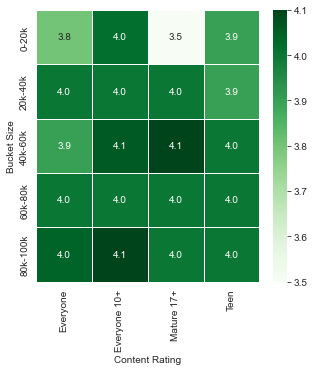

In [46]:
fig,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(tmp, annot=True, linewidths=.5, cmap='Greens',fmt='.1f',ax=ax)
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

-Basing on the heatmaps above we can see that the apps in the buckets (40k-60k) and (80k-100k) are having the highest rating in all the categories. Hence it can be inferred that heavier apps have a preference over the lighter apps.